In [1]:
# Google Colab에서 한글 폰트 설정
# !fc-cache -fv
# !rm ~/.cache/matplotlib -rf

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/dejavu: skipping, looped directory detected
/usr/share/fonts/truetyp

In [2]:
# 필요한 패키지 설치
!pip install konlpy
!pip install wordcloud
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install gensim
!pip install tensorflow
!pip install nltk
!apt-get update -qq
!apt-get install fonts-nanum* -qq
!apt-get install g++ openjdk-8-jdk python3-dev python3-pip curl
!pip install JPype1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
# KoNLPy 불러오기
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import nltk
from nltk.corpus import stopwords
import warnings
import matplotlib.font_manager as fm
from wordcloud import WordCloud
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from gensim.models import Word2Vec

warnings.filterwarnings('ignore')



W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
g++ is already the newest version (4:11.2.0-1ubuntu1).
curl is already the newest version (7.81.0-1ubuntu1.20).
python3-dev is already the newest version (3.10.6-1~22.04.1).
openjdk-8-jdk is already the newest version (8u442-b06~us1-0ubuntu1~22.04).
python3-pip is already the newest version (22.0.2+dfsg-1ubuntu0.5).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


데이터 샘플:
    user_id    hotel  rating  \
0  user_122   로얄 스위트       1   
1  user_131    시티 호텔       5   
2  user_277   골든 팰리스       5   
3   user_59   그랜드 호텔       4   
4   user_55  하이엔드 호텔       5   

                                              review        date sentiment  
0  로얄 스위트 욕실 시설이 노후되었습니다. 샤워 수압도 약하고 온수가 잘 나오지 않았어요.  2024-05-07        부정  
1       시티 호텔에서의 경험은 최고였습니다. 특히 수영장과 스파 시설이 인상적이었어요.  2024-08-24        긍정  
2      골든 팰리스의 가격 대비 만족도가 높았습니다. 다른 친구들에게도 추천하고 싶어요.  2024-02-28        긍정  
3        그랜드 호텔 뷰가 정말 아름다웠습니다. 창문에서 보이는 전경이 환상적이었어요.  2024-01-27        긍정  
4  하이엔드 호텔 위치가 관광하기 정말정말 편리했습니다. 주변에 볼거리도 많고 접근성이...  2024-03-12        긍정  

데이터 통계:
            rating
count  2000.000000
mean      3.478000
std       1.414042
min       1.000000
25%       2.000000
50%       4.000000
75%       5.000000
max       5.000000

호텔별 리뷰 수:
hotel
시티 호텔      228
로얄 스위트     220
하이엔드 호텔    215
그랜드 호텔     213
바다뷰 리조트    204
캐슬 인       201
골든 팰리스     195
파크 호텔      180
산장 호텔      173
클래식 호

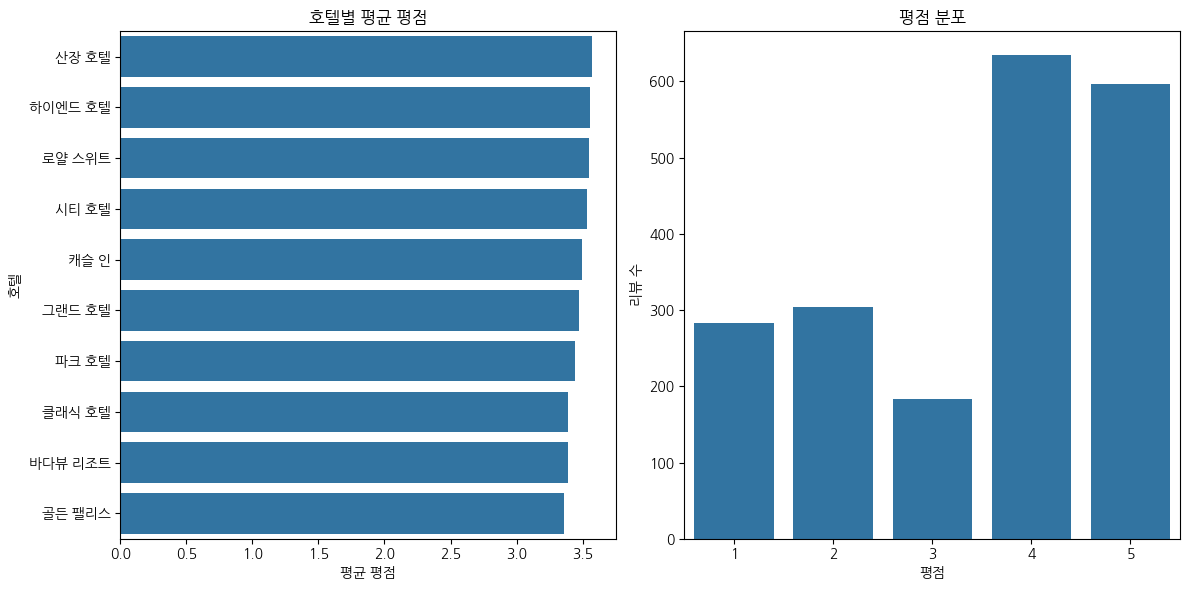

<Figure size 1400x700 with 0 Axes>

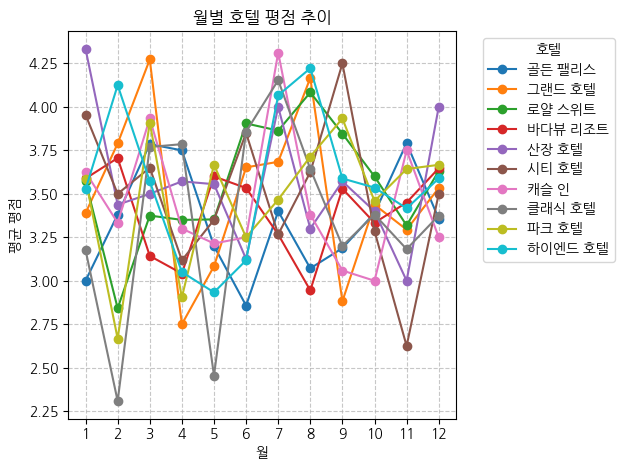

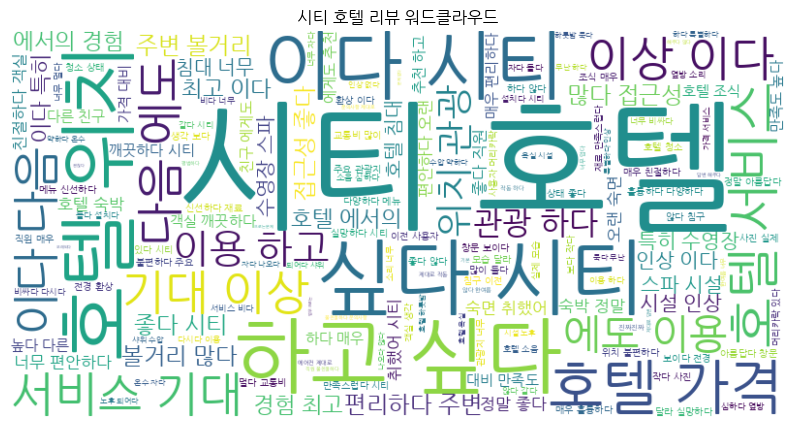

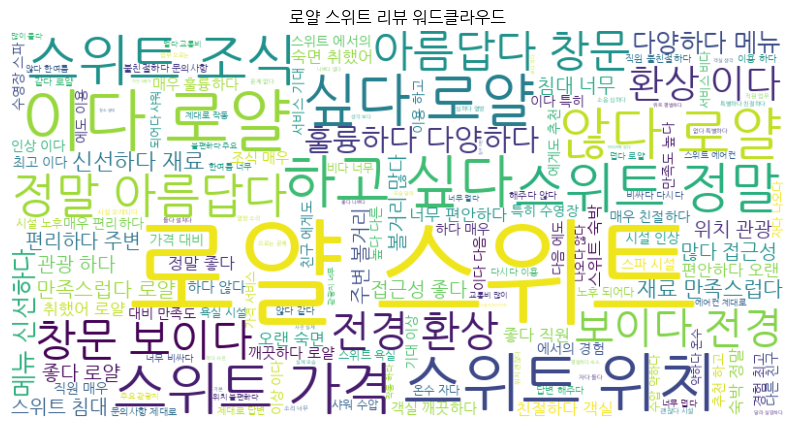

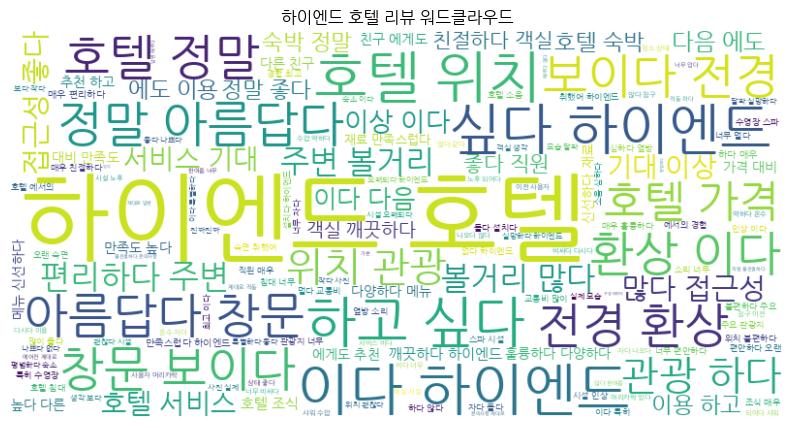


리뷰 토픽 분석 결과:
토픽 #1: 좋다 하다 위치 주변 관광 많다 접근성 편리하다 볼거리 호텔
토픽 #2: 호텔 하고 싶다 직원 정말 서비스 기대 에도 이상 다음
토픽 #3: 호텔 정말 이다 환상 창문 보이다 전경 아름답다 시설 않다
토픽 #4: 너무 호텔 않다 들다 하다 서비스 가격 이용 다시다 같다
토픽 #5: 호텔 이다 메뉴 조식 너무 훌륭하다 만족스럽다 신선하다 재료 다양하다

감성 분석 모델 성능:
              precision    recall  f1-score   support

          부정       1.00      1.00      1.00       112
          긍정       1.00      1.00      1.00       252

    accuracy                           1.00       364
   macro avg       1.00      1.00      1.00       364
weighted avg       1.00      1.00      1.00       364


사용자 user_122:
방문한 호텔: 로얄 스위트, 하이엔드 호텔, 캐슬 인, 클래식 호텔
추천 호텔: 시티 호텔, 그랜드 호텔, 파크 호텔

사용자 user_131:
방문한 호텔: 시티 호텔, 캐슬 인, 파크 호텔, 그랜드 호텔, 골든 팰리스
추천 호텔: 하이엔드 호텔, 산장 호텔, 로얄 스위트

사용자 user_277:
방문한 호텔: 골든 팰리스, 클래식 호텔, 바다뷰 리조트
추천 호텔: 시티 호텔, 파크 호텔, 로얄 스위트

사용자 user_59:
방문한 호텔: 그랜드 호텔, 시티 호텔, 바다뷰 리조트, 파크 호텔
추천 호텔: 캐슬 인, 골든 팰리스, 산장 호텔

사용자 user_55:
방문한 호텔: 하이엔드 호텔, 파크 호텔, 캐슬 인, 그랜드 호텔
추천 호텔: 시티 호텔, 로얄 스위트, 클래식 호텔

컨텐츠 기반 호텔 추천 예시:

그랜드 호텔과(와) 유사한 호텔:


In [3]:


# 한글 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# NLTK 다운로드
nltk.download('stopwords')

# 한국어 불용어 리스트 (예시)
korean_stopwords = ['이', '그', '저', '것', '이것', '저것', '그것', '는', '을', '를', '이', '가', '은', '는', '의', '으로', '에', '에서', '와', '과', '로', '으로']

# 가상의 호텔 리뷰 데이터 생성
np.random.seed(42)

# 호텔 이름 리스트
hotels = ['그랜드 호텔', '파크 호텔', '시티 호텔', '바다뷰 리조트', '산장 호텔', '골든 팰리스', '로얄 스위트', '캐슬 인', '클래식 호텔', '하이엔드 호텔']

# 긍정적인 리뷰 템플릿
positive_reviews = [
    "{hotel} 숙박이 정말 좋았습니다. 직원들이 매우 친절하고 객실도 깨끗했어요.",
    "{hotel}의 조식이 매우 훌륭했습니다. 다양한 메뉴와 신선한 재료로 만족스러웠어요.",
    "{hotel}에서의 경험은 최고였습니다. 특히 수영장과 스파 시설이 인상적이었어요.",
    "{hotel} 위치가 관광하기 매우 편리했습니다. 주변에 볼거리도 많고 접근성이 좋아요.",
    "{hotel}의 서비스가 기대 이상이었습니다. 다음에도 꼭 이용하고 싶어요.",
    "{hotel} 뷰가 정말 아름다웠습니다. 창문에서 보이는 전경이 환상적이었어요.",
    "{hotel} 침대가 너무 편안했습니다. 오랜만에 숙면을 취했어요.",
    "{hotel}의 가격 대비 만족도가 높았습니다. 다른 친구들에게도 추천하고 싶어요."
]

# 부정적인 리뷰 템플릿
negative_reviews = [
    "{hotel} 객실이 생각보다 작았습니다. 사진과 실제 모습이 달라 실망했어요.",
    "{hotel}의 직원들이 불친절했습니다. 문의사항에 제대로 답변해주지 않았어요.",
    "{hotel} 청소 상태가 좋지 않았습니다. 침구에 이전 사용자의 머리카락이 있었어요.",
    "{hotel}의 소음이 심했습니다. 옆방 소리가 너무 잘 들려 잠을 설쳤어요.",
    "{hotel} 가격이 서비스에 비해 너무 비쌌습니다. 다시는 이용하지 않을 것 같아요.",
    "{hotel}의 위치가 불편했습니다. 주요 관광지에서 너무 멀어 교통비가 많이 들었어요.",
    "{hotel} 욕실 시설이 노후되었습니다. 샤워 수압도 약하고 온수가 잘 나오지 않았어요.",
    "{hotel}의 에어컨이 제대로 작동하지 않았습니다. 한여름에 너무 더웠어요."
]

# 중립적인 리뷰 템플릿
neutral_reviews = [
    "{hotel}은 평범한 숙소였습니다. 특별히 좋거나 나쁜 점은 없었어요.",
    "{hotel}의 위치는 괜찮았지만 시설은 좀 오래되었어요.",
    "{hotel} 가격은 적당했습니다. 기본적인 서비스는 모두 제공되었어요.",
    "{hotel}에서 하룻밤 묵었는데 무난했습니다. 특별한 인상은 없었어요.",
    "{hotel}의 직원들은 업무적으로는 문제가 없었지만 특별히 친절하지는 않았어요.",
    "{hotel} 조식은 기본적인 메뉴로 구성되어 있었습니다. 맛은 평범했어요."
]

# 데이터 생성 함수
def generate_review_data(n_samples=1000):
    data = []

    for _ in range(n_samples):
        hotel = np.random.choice(hotels)
        sentiment = np.random.choice(['긍정', '부정', '중립'], p=[0.6, 0.3, 0.1])

        if sentiment == '긍정':
            review_template = np.random.choice(positive_reviews)
            rating = np.random.randint(4, 6)  # 4-5점
        elif sentiment == '부정':
            review_template = np.random.choice(negative_reviews)
            rating = np.random.randint(1, 3)  # 1-2점
        else:
            review_template = np.random.choice(neutral_reviews)
            rating = 3  # 3점

        review = review_template.format(hotel=hotel)

        # 약간의 무작위성 추가
        if np.random.random() < 0.3:
            typos = ['너무너무', '정말정말', '매우매우', '진짜진짜']
            review = review.replace('매우', np.random.choice(typos))

        # 날짜 생성 (2024년)
        month = np.random.randint(1, 13)
        day = np.random.randint(1, 29)
        date = f'2024-{month:02d}-{day:02d}'

        # 사용자 ID 생성
        user_id = f'user_{np.random.randint(1, 501)}'

        data.append({
            'user_id': user_id,
            'hotel': hotel,
            'rating': rating,
            'review': review,
            'date': date,
            'sentiment': sentiment
        })

    return pd.DataFrame(data)

# 가상 데이터 생성
df = generate_review_data(2000)
print("데이터 샘플:")
print(df.head())
print("\n데이터 통계:")
print(df.describe())
print("\n호텔별 리뷰 수:")
print(df['hotel'].value_counts())
print("\n평점 분포:")
print(df['rating'].value_counts().sort_index())

# 데이터 시각화
plt.figure(figsize=(12, 6))

# 호텔별 평균 평점
plt.subplot(1, 2, 1)
hotel_ratings = df.groupby('hotel')['rating'].mean().sort_values(ascending=False)
sns.barplot(x=hotel_ratings.values, y=hotel_ratings.index)
plt.title('호텔별 평균 평점')
plt.xlabel('평균 평점')
plt.ylabel('호텔')

# 평점 분포
plt.subplot(1, 2, 2)
sns.countplot(x='rating', data=df)
plt.title('평점 분포')
plt.xlabel('평점')
plt.ylabel('리뷰 수')

plt.tight_layout()
plt.show()

# 시간에 따른 호텔별 평점 추이
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

plt.figure(figsize=(14, 7))
monthly_ratings = df.groupby(['month', 'hotel'])['rating'].mean().unstack()
monthly_ratings.plot(marker='o')
plt.title('월별 호텔 평점 추이')
plt.xlabel('월')
plt.ylabel('평균 평점')
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='호텔', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 자연어 처리를 위한 함수
okt = Okt()

def preprocess_text(text):
    # 한글과 공백을 제외한 문자 제거
    text = re.sub(r'[^가-힣\s]', '', text)

    # 형태소 분석
    tokens = okt.morphs(text, stem=True)

    # 불용어 제거
    tokens = [token for token in tokens if token not in korean_stopwords and len(token) > 1]

    return ' '.join(tokens)

# 리뷰 전처리
df['processed_review'] = df['review'].apply(preprocess_text)

# 호텔별 워드클라우드 생성
def generate_wordcloud(hotel_name):
    hotel_reviews = ' '.join(df[df['hotel'] == hotel_name]['processed_review'].tolist())

    wordcloud = WordCloud(
        font_path=font_path,
        width=800,
        height=400,
        background_color='white'
    ).generate(hotel_reviews)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{hotel_name} 리뷰 워드클라우드')
    plt.axis('off')
    plt.show()

# 상위 3개 호텔에 대한 워드클라우드 생성
top_hotels = df['hotel'].value_counts().nlargest(3).index
for hotel in top_hotels:
    generate_wordcloud(hotel)

# 토픽 모델링 (LDA)
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['processed_review'])
feature_names = vectorizer.get_feature_names_out()

# LDA 모델 학습
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

# 토픽 시각화
def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        print(f"토픽 #{topic_idx + 1}: {' '.join(top_words)}")

print("\n리뷰 토픽 분석 결과:")
display_topics(lda, feature_names, 10)

# 감성 분석 모델 학습
# 긍정/부정으로 이진 분류 (중립은 제외)
binary_df = df[df['sentiment'] != '중립'].copy()
binary_df['sentiment_binary'] = binary_df['sentiment'].map({'긍정': 1, '부정': 0})

# 특성 벡터화
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(binary_df['processed_review'])
y = binary_df['sentiment_binary']

# 훈련/테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)

# 모델 평가
y_pred = lr.predict(X_test)
print("\n감성 분석 모델 성능:")
print(classification_report(y_test, y_pred, target_names=['부정', '긍정']))

# 호텔 추천 시스템 구현
# 사용자-호텔 매트릭스 생성
user_hotel_matrix = df.pivot_table(index='user_id', columns='hotel', values='rating', fill_value=0)

# 유사도 기반 호텔 추천 함수
def recommend_hotels(user_id, user_hotel_matrix, n_recommendations=3):
    # 사용자가 방문한 호텔과 평점
    user_ratings = user_hotel_matrix.loc[user_id]
    visited_hotels = user_ratings[user_ratings > 0].index.tolist()

    # 방문한 호텔이 없다면 높은 평점의 호텔 추천
    if not visited_hotels:
        top_hotels = df.groupby('hotel')['rating'].mean().sort_values(ascending=False).head(n_recommendations).index.tolist()
        return top_hotels

    # 호텔 간 유사도 계산
    hotel_similarity = cosine_similarity(user_hotel_matrix.T)
    hotel_similarity_df = pd.DataFrame(hotel_similarity, index=user_hotel_matrix.columns, columns=user_hotel_matrix.columns)

    # 방문한 호텔과 유사한 호텔 찾기
    similar_hotels_scores = pd.Series(dtype='float64')

    for hotel in visited_hotels:
        # 이미 방문한 호텔 제외
        similarity = hotel_similarity_df[hotel].drop(visited_hotels)
        # 방문한 호텔의 평점에 가중치 부여
        weighted_similarity = similarity * user_ratings[hotel]
        similar_hotels_scores = similar_hotels_scores.add(weighted_similarity, fill_value=0)

    # 유사도 점수가 높은 호텔 추천
    recommendations = similar_hotels_scores.sort_values(ascending=False).head(n_recommendations).index.tolist()

    return recommendations

# 사용자별 호텔 추천 예시
sample_users = df['user_id'].unique()[:5]
for user in sample_users:
    recommended_hotels = recommend_hotels(user, user_hotel_matrix)
    visited_hotels = df[df['user_id'] == user]['hotel'].unique()

    print(f"\n사용자 {user}:")
    print(f"방문한 호텔: {', '.join(visited_hotels)}")
    print(f"추천 호텔: {', '.join(recommended_hotels)}")

# 컨텐츠 기반 필터링 추천 시스템
# 호텔 리뷰 텍스트 기반 유사도 계산
hotel_reviews = df.groupby('hotel')['processed_review'].apply(' '.join)
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
hotel_tfidf = tfidf_vectorizer.fit_transform(hotel_reviews)
hotel_tfidf_similarity = cosine_similarity(hotel_tfidf)
hotel_tfidf_sim_df = pd.DataFrame(hotel_tfidf_similarity, index=hotel_reviews.index, columns=hotel_reviews.index)

def content_based_recommendation(hotel_name, similarity_df, n_recommendations=3):
    # 입력 호텔과 유사한 호텔 찾기
    similar_hotels = similarity_df[hotel_name].drop(hotel_name).sort_values(ascending=False).head(n_recommendations)
    return similar_hotels.index.tolist(), similar_hotels.values.tolist()

# 컨텐츠 기반 추천 예시
print("\n컨텐츠 기반 호텔 추천 예시:")
for hotel in hotels[:3]:
    similar_hotels, similarity_scores = content_based_recommendation(hotel, hotel_tfidf_sim_df)
    print(f"\n{hotel}과(와) 유사한 호텔:")
    for h, score in zip(similar_hotels, similarity_scores):
        print(f"- {h} (유사도: {score:.3f})")

# 하이브리드 추천 시스템
def hybrid_recommendation(user_id, hotel_name, user_hotel_matrix, similarity_df, alpha=0.7, n_recommendations=3):
    # 협업 필터링 추천
    cf_recommendations = recommend_hotels(user_id, user_hotel_matrix, n_recommendations=n_recommendations*2)

    # 컨텐츠 기반 추천
    cb_recommendations, _ = content_based_recommendation(hotel_name, similarity_df, n_recommendations=n_recommendations*2)

    # 두 추천 결과 결합
    cf_score = {hotel: (n_recommendations*2 - i) / (n_recommendations*2) for i, hotel in enumerate(cf_recommendations)}
    cb_score = {hotel: (n_recommendations*2 - i) / (n_recommendations*2) for i, hotel in enumerate(cb_recommendations)}

    # 모든 추천 호텔 목록
    all_recommendations = list(set(cf_recommendations + cb_recommendations))

    # 하이브리드 점수 계산
    hybrid_scores = []
    for hotel in all_recommendations:
        cf_value = cf_score.get(hotel, 0)
        cb_value = cb_score.get(hotel, 0)
        # 가중치를 적용한 하이브리드 점수
        hybrid_value = alpha * cf_value + (1 - alpha) * cb_value
        hybrid_scores.append((hotel, hybrid_value))

    # 점수 기준 정렬 및 상위 n개 추천
    hybrid_recommendations = sorted(hybrid_scores, key=lambda x: x[1], reverse=True)[:n_recommendations]

    return [hotel for hotel, _ in hybrid_recommendations]

# 하이브리드 추천 예시
print("\n하이브리드 추천 시스템 예시:")
sample_user = df['user_id'].unique()[0]
visited_hotel = df[df['user_id'] == sample_user]['hotel'].iloc[0]

print(f"사용자 {sample_user}가 {visited_hotel}에 방문한 경우 추천:")
hybrid_results = hybrid_recommendation(sample_user, visited_hotel, user_hotel_matrix, hotel_tfidf_sim_df)
print(f"추천 호텔: {', '.join(hybrid_results)}")

# 추천 시스템 웹 인터페이스 (Colab에서는 실행하지 않음, 코드만 제공)
"""
from flask import Flask, request, jsonify, render_template

app = Flask(__name__)

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/recommend', methods=['POST'])
def recommend():
    data = request.json
    user_id = data.get('user_id')
    hotel = data.get('hotel')

    recommendations = hybrid_recommendation(user_id, hotel, user_hotel_matrix, hotel_tfidf_sim_df)

    return jsonify({
        'recommendations': recommendations
    })

if __name__ == '__main__':
    app.run(debug=True)
"""

# 결론 및 제안사항
print("\n===== 분석 결론 및 제안사항 =====")
# 호텔별 평균 평점
hotel_avg_ratings = df.groupby('hotel')['rating'].mean().sort_values(ascending=False)
best_hotel = hotel_avg_ratings.index[0]
worst_hotel = hotel_avg_ratings.index[-1]

print(f"1. 최고 평점 호텔: {best_hotel} ({hotel_avg_ratings[best_hotel]:.2f}점)")
print(f"2. 최저 평점 호텔: {worst_hotel} ({hotel_avg_ratings[worst_hotel]:.2f}점)")

# 긍정/부정 키워드 분석
def get_top_keywords(texts, sentiment, n=5):
    # 해당 감성의 리뷰만 선택
    selected_texts = ' '.join(texts[df['sentiment'] == sentiment])

    # 단어 카운트
    words = okt.nouns(selected_texts)
    word_count = Counter([w for w in words if len(w) > 1 and w not in korean_stopwords])

    # 상위 키워드 반환
    return word_count.most_common(n)

positive_keywords = get_top_keywords(df['review'], '긍정')
negative_keywords = get_top_keywords(df['review'], '부정')

print("\n3. 고객 만족 주요 키워드:")
for word, count in positive_keywords:
    print(f"   - {word} ({count}회 언급)")

print("\n4. 고객 불만족 주요 키워드:")
for word, count in negative_keywords:
    print(f"   - {word} ({count}회 언급)")

print("\n5. 개선 제안사항:")
for hotel in hotels[:3]:  # 상위 3개 호텔에 대한 제안사항
    hotel_df = df[df['hotel'] == hotel]
    hotel_rating = hotel_df['rating'].mean()

    print(f"\n   {hotel} (평균 평점: {hotel_rating:.2f}):")

    if hotel_rating >= 4.5:
        print("   - 현재 높은 평점을 유지하고 있으나, 지속적인 서비스 품질 관리가 필요합니다.")
    elif hotel_rating >= 4.0:
        neg_keywords = get_top_keywords(hotel_df['review'], '부정', 3)
        print(f"   - 개선 필요 사항: {', '.join([w for w, _ in neg_keywords])}")
        print("   - 전반적으로 좋은 평가를 받고 있으나, 위 키워드 관련 서비스 개선이 필요합니다.")
    else:
        neg_keywords = get_top_keywords(hotel_df['review'], '부정', 5)
        print(f"   - 시급한 개선 필요 사항: {', '.join([w for w, _ in neg_keywords])}")
        print("   - 고객 만족도가 낮은 편으로, 전반적인 서비스 품질 향상이 필요합니다.")

print("\n6. 추천 시스템 활용 방안:")
print("   - 고객별 맞춤형 호텔 추천으로 재방문율 향상")
print("   - 유사 호텔 추천을 통한 교차 마케팅 기회 확대")
print("   - 고객 리뷰 기반 호텔 포지셔닝 전략 수립")
print("   - 계절별, 시기별 추천 패턴 분석을 통한 마케팅 최적화")